# Final Assignment Part B

For this project, we want to investigate vehicle collisions in New York City, including the five boroughs: Manhattan, Brookly, Queens. bronx and staten island. 

We are going to be using two different datasets, one on collisions in New York city, and the other to know the location of the different boroughs.

The first dataset is around 0.5 MB, and contains information about almost 2 mil. vehicle collisions in the different areas of the city that was mentioned, starting from the 1 of january 2013 to the 31 of december 2021, so 9 full years. The dataset has information such as the time and date of the crash, along with the position (including gps coordinates, borough, streetname and zipcode).

The other dataset simply contains gps coordinates for the borders between the different districts.

With these datasets we can analyse which areas are the most dangerous to drive in with regards to collisions with other vehicles, and also other things related to collisions such as which times of the day are the safest to drive or if there has been improvements over the years.

The plots seen here are mockups of what we envision to do, both with the intention of getting information based on time and location of the collisions.

The genre we have chosen is the Magazine style mentioned by Segel and Heer. We feel that the magazine style is right for our project as it is mostly author-driven piece with a strict linear path, as we want to tell a story of traffic collissions in NYC.



In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('..\data\Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\cccec\AppData\Local\Temp\ipykernel_7212\2759405053.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('..\data\Motor_Vehicle_Collisions_-_Crashes.csv')


In [8]:
# Number of rows
print('Number of rows: ' + str(len(data)))

# Number of rows where borough is not NaN
print('Number of rows where borough is known: ' + str(len(data[data['BOROUGH'] != data['BOROUGH']])))
print('Number of rows where location is known: ' + str(len(data[data['LOCATION'] != data['LOCATION']])))

# Number of variables

# Date range
print('Earliest date: ' + str(data["CRASH DATE"].min()))
print('Latest date: ' + str(data["CRASH DATE"].max()))

Number of rows: 1983697
Number of rows where borough is known: 616866
Number of rows where location is known: 226930
Earliest date: 01/01/2013
Latest date: 12/31/2022


<AxesSubplot: >

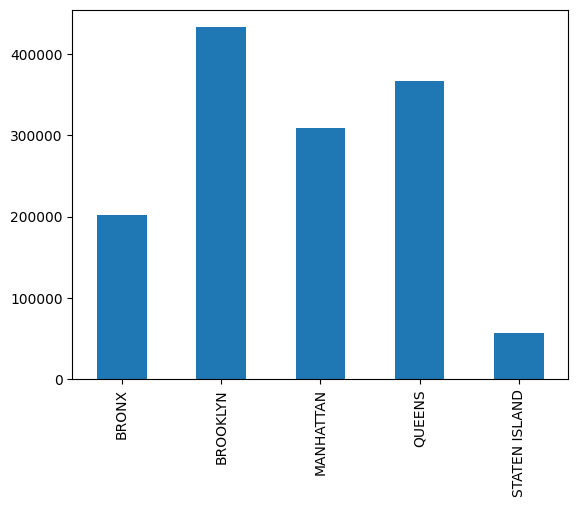

In [9]:
data['BOROUGH'].value_counts().sort_index().plot.bar(x='Target Value', y='Number of Occurrences')

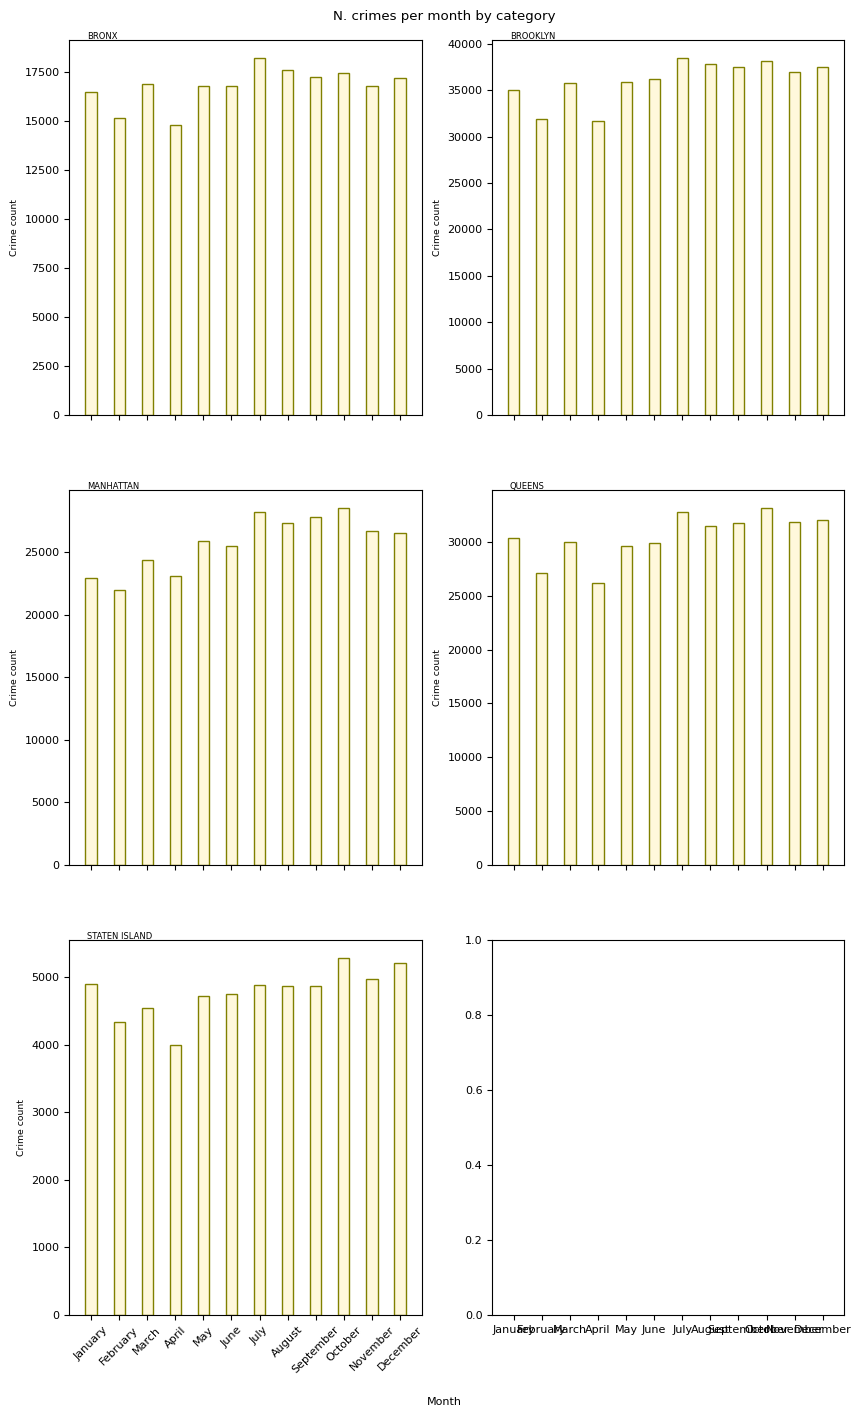

In [10]:
data_months = data # Copying dataframe
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_months['Month'] = pd.to_datetime(data_months['CRASH DATE']).dt.strftime('%B') # Creating a new column with the name of the month

data_months = data_months.groupby(['Month','BOROUGH']).size().to_frame().reset_index() # Grouping by month and category
data_months['Month'] = pd.Categorical(data_months['Month'], categories=months, ordered=True) # Correcting the order of the months for the plot
data_months = data_months.sort_values('Month')

plt.rcParams.update({'font.size': 8})

grouped = data_months.groupby('BOROUGH')
fig, axs = plt.subplots(figsize=(10,15), nrows=3, ncols=2, sharex=True)
targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.bar(grouped.get_group(key)['Month'],grouped.get_group(key)[0], width=0.4, color='cornsilk', edgecolor='olive') 
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylabel('Crime count', fontsize='small')
    ax.set_title(key, x=0.05, y=0.98, fontsize=6, loc='left')
fig.text(0.5, 0.05,'Month', ha='center')
fig.suptitle('N. crimes per month by category')
fig.subplots_adjust(top=0.96)
plt.show()